# Missing Values/Duplicates

In this lecture we will continue our journey of Data Manipulation with pandas after reviewing some fundamental aspects of the syntax
    
1. Review
    * [Review of "brackets"](#Review-of-"brackets")
2. Pandas
    * [Dealing with Missing Values](#Missing-Values)
    * [Dealing with Duplicates](#Duplicate-Values)
2. [Plot of the Day](#Plotting)
    * boxplot


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Review of "brackets"

In Python, there are several types of brackets used for different purposes. Here's a brief review of the most commonly used brackets:

1. Parentheses `( )`: Parentheses are used for grouping expressions, defining function parameters, and invoking functions. They are also used in mathematical expressions to indicate order of operations.

2. Square brackets `[ ]`: Square brackets are primarily used for indexing and slicing operations on lists, tuples, and strings. They allow you to access individual elements or extract subsequences from these data types.

3. Curly brackets or braces `{ }`: Curly brackets are used to define dictionaries, which are key-value pairs. Dictionaries store data in an unordered manner, and you can access or manipulate values by referencing their corresponding keys within the curly brackets.


It's important to note that the usage of these brackets may vary depending on the specific context or programming paradigm you're working with. Nonetheless, understanding their general purpose will help you navigate Python code effectively.

##### Examples

Here are a few examples of how each type of bracket is used in Python:

1. Parentheses `( )`:
   - Grouping expressions:
     ```python
     result = (2 + 3) * 4  
     # Output: 20
     ```
   - Defining function parameters:
     ```python
     def greet(name):
         print("Hello, " + name + "!")

     greet("Alice")  
     # Output: Hello, Alice!
     ```
   - Invoking functions:
     ```python
     result = max(5, 10)  
     # Output: 10
     ```

2. Square brackets `[ ]`:
   - Indexing and slicing:
     ```python
     my_list = [1, 2, 3, 4, 5]
     print(my_list[0])      
     # Output: 1
     print(my_list[1:3])    
     # Output: [2, 3]
     ```
   - Modifying list elements:
     ```python
     my_list = [1, 2, 3]
     my_list[1] = 10
     print(my_list)         
     # Output: [1, 10, 3]
     ```

3. Curly brackets or braces `{ }`:
   - Defining dictionaries:
     ```python
     my_dict = {"name": "Alice", "age": 25, "city": "London"}
     print(my_dict["name"])    
     # Output: Alice
     ```
   - Modifying dictionary values:
     ```python
     my_dict = {"name": "Alice", "age": 25}
     my_dict["age"] = 30
     print(my_dict)            
     # Output: {'name': 'Alice', 'age': 30}
     ```


Remember that the usage of brackets can vary depending on the specific programming context, but these examples provide a general understanding of their usage in Python.

### [Tasks](Lecture6_exercises.ipynb)

### Data Manipulation with pandas

While we have seen panda's ability to (i) mix data types (strings, numbers, categories, Boolean, ...) and (ii) refer to columns and rows by names, this library offers a lot more powerful tools for efficiently gaining insights from data, e.g.


- deal with missing values







### Missing Values

Missing data occurs commonly in many data analysis applications. 
Most often they are a consequence of

- data entry errors, or 
- unknown numbers, or
- `groupby` operations, or
- wrong mathematical operations (`1/0`, $\sqrt{-1}$,$\log(0)$, ...)
- "not applicable" questions, or
- ....

For data with float type, pandas uses the floating-point value `NaN` (Not a Number) to represent missing data.

Pandas refers to missing data as `NA`, which stands for *not available*.

The built-in Python `None` value is also treated as NA:

Recall constructing a DataFrame from a dictionary of equal-length lists or NumPy arrays (Lecture 4).
What if there were data entry errors or just unknown numbers

In [ ]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, None, 2001, 2002, 2003],
        "gdp": [1.5, 1.7, 3.6, 2.4, np.nan, 3.2]}
frame = pd.DataFrame(data)# creates a dataframe out of the data given!
df = frame
frame

,state,year,gdp
0,Ohio,2000.0,1.5
1,Ohio,2001.0,1.7
2,Ohio,NaN,3.6
3,Nevada,2001.0,2.4
4,Nevada,2002.0,NaN
5,Nevada,2003.0,3.2


In [ ]:
x = np.array([1,2,3,4])
x==2
#remove those values of x that are equal to 2
#x[[0,2,3]]
x[x!=2]

array([1, 3, 4])

In [ ]:
frame.columns[frame.isna().any()]

Index(['year', 'gdp'], dtype='object')

(Note the annoying conversion of integers to float, a solution discussed [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html))

#### Filtering Out Missing Data

There are a few ways to filter out missing data. While you always have the option to do it by hand using `pandas.isna` and Boolean indexing, `dropna` can be helpful.

With DataFrame objects, there are different ways to remove missing data. You may want to drop rows or columns that are all `NA`, or only those rows or columns containing any `NA`s at all. `dropna` by default drops any row containing a missing value:

In [ ]:
frame.dropna()

,state,year,gdp
0,Ohio,2000.0,1.5
1,Ohio,2001.0,1.7
3,Nevada,2001.0,2.4
5,Nevada,2003.0,3.2


Passing `how="all"` will drop only rows that are all NA:

In [ ]:
frame.dropna(how="all")

,state,year,gdp
0,Ohio,2000.0,1.5
1,Ohio,2001.0,1.7
2,Ohio,NaN,3.6
3,Nevada,2001.0,2.4
4,Nevada,2002.0,NaN
5,Nevada,2003.0,3.2


To drop columns in the same way, pass `axis="columns"`:

In [ ]:
frame.dropna(axis="columns")

,state
0,Ohio
1,Ohio
2,Ohio
3,Nevada
4,Nevada
5,Nevada


Suppose you want to keep only rows containing at most a certain number of missing observations. You can indicate this with the `thresh` argument:

In [ ]:
frame.iloc[2,2] = np.nan
frame

,state,year,gdp
0,Ohio,2000.0,1.5
1,Ohio,2001.0,1.7
2,Ohio,NaN,NaN
3,Nevada,2001.0,2.4
4,Nevada,2002.0,NaN
5,Nevada,2003.0,3.2


In [ ]:
frame.dropna(thresh=2)

,state,year,gdp
0,Ohio,2000.0,1.5
1,Ohio,2001.0,1.7
3,Nevada,2001.0,2.4
4,Nevada,2002.0,NaN
5,Nevada,2003.0,3.2


#### Filling In Missing Data

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. For most purposes, the fillna method is the workhorse function to use. Calling `fillna` with a constant replaces missing values with that value:


In [ ]:
frame2 = frame
frame2.iloc[0,0] = np.nan#None
frame2.iloc[0,2] = np.nan
frame2
#frame2.fillna(0)
#type(frame2["state"])

,state,year,gdp
0,NaN,2000.0,NaN
1,Ohio,2001.0,1.70
2,Ohio,NaN,3.60
3,Nevada,2001.0,2.40
4,Nevada,2002.0,2.48
5,Nevada,2003.0,3.20


Calling `fillna` with a dictionary, you can use a different fill value for each column:

In [ ]:
frame2.fillna({"state" : "Neverland", "year": -999, "gdp": 0})

,state,year,gdp
0,Neverland,2000.0,0.00
1,Ohio,2001.0,1.70
2,Ohio,-999.0,3.60
3,Nevada,2001.0,2.40
4,Nevada,2002.0,2.48
5,Nevada,2003.0,3.20


With `fillna` you can do lots of other things such as simple data imputation using the median or mean statistics, at least for purely numeric data types:

In [ ]:
frame['gdp'] = frame['gdp'].fillna(frame['gdp'].mean())
frame

,state,year,gdp
0,NaN,2000.0,1.50
1,Ohio,2001.0,1.70
2,Ohio,NaN,3.60
3,Nevada,2001.0,2.40
4,Nevada,2002.0,2.48
5,Nevada,2003.0,3.20


Different values for each column

In [ ]:
df.fillna(df.mean())

<ipython-input-5-a2478f315f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,state,year,gdp
0,Ohio,2000.0,1.50
1,Ohio,2001.0,1.70
2,Ohio,2001.4,3.60
3,Nevada,2001.0,2.40
4,Nevada,2002.0,2.48
5,Nevada,2003.0,3.20


In [ ]:
fillna(frame['gdp'].mean())

-------------------------

### Duplicate Values

Duplicate rows may be found in a DataFrame for any number of reasons. 

 Removing duplicates in pandas can be useful in various scenarios, particularly when working with large datasets or performing data analysis. Here's a convincing example to illustrate its usefulness:

Let's say you have a dataset containing sales transactions from an online store. Each transaction record consists of multiple columns, including customer ID, product ID, purchase date, and purchase amount. Due to various reasons such as system glitches or human errors, duplicate entries might exist in the dataset, meaning that multiple identical transaction records are present.

In such a scenario, removing duplicates becomes beneficial for several reasons:

1. Accurate Analysis: Duplicate entries can skew your analysis and lead to incorrect conclusions. By removing duplicates, you ensure that each transaction is represented only once, providing more accurate insights and preventing inflated or biased results.

2. Data Integrity: Duplicate entries consume unnecessary storage space and can make data management more challenging. By eliminating duplicates, you maintain data integrity and ensure a clean and organized dataset.

3. Efficiency: When dealing with large datasets, duplicate records can significantly impact computational efficiency. Removing duplicates allows you to streamline your data processing operations, leading to faster analysis and improved performance.

4. Unique Identifiers: Removing duplicates becomes crucial when working with columns that should contain unique values, such as customer IDs or product IDs. By eliminating duplicates, you ensure the integrity of these unique identifiers and prevent issues when performing joins or merging dataframes.

To remove duplicates in pandas, you can use the `drop_duplicates()` function. It identifies and removes duplicate rows based on specified columns or all columns in the dataframe, depending on your requirements.

Overall, removing duplicates in pandas is essential for maintaining data accuracy, integrity, and efficiency, allowing you to derive meaningful insights and make informed decisions based on reliable data.

In [ ]:
#super simple example:
frame.iloc[5] = frame.iloc[4]#this line makes lines 5 and 6 equal 
frame

,state,year,gdp
0,NaN,2000.0,NaN
1,Ohio,2001.0,1.70
2,Ohio,NaN,3.60
3,Nevada,2001.0,2.40
4,Nevada,2002.0,2.48
5,Nevada,2002.0,2.48


The DataFrame method `duplicated` returns a Boolean Series indicating whether each row is a duplicate 

In [ ]:
frame.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Relatedly, `drop_duplicates` returns a DataFrame with rows where the `duplicated` array is `False` filtered out:

In [ ]:
frame.drop_duplicates()

,state,year,gdp
0,NaN,2000.0,NaN
1,Ohio,2001.0,1.70
2,Ohio,NaN,3.60
3,Nevada,2001.0,2.40
4,Nevada,2002.0,2.48


Both methods by default consider all of the columns; alternatively, you can specify any `subset` of them to detect duplicates.

In [ ]:
frame.drop_duplicates(subset=["year"])

,state,year,gdp
0,NaN,2000.0,NaN
1,Ohio,2001.0,1.70
2,Ohio,NaN,3.60
4,Nevada,2002.0,2.48


--------------------------

##### Titanic data

In [ ]:
# Since pandas does not have any built in data, I am going to "cheat" and 
# make use of the `seaborn` library
import seaborn as sns 

titanic = sns. load_dataset('titanic')
titanic["3rdClass"] = titanic["pclass"]==3
titanic["male"] = titanic["sex"]=="male"

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,3rdClass,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,False,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False,True


In [ ]:
#how many missing values in age ?
np.sum(titanic["age"].isna())

177

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
np.mean(titanic["age"])

np.sum(titanic["age"])/714

titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

29.69911764705882

Notice that the age columns contains missing values, which is a big topic by itself in data science.

How should an aggregating react to and handle missing values? The default often is to ignore and exclude them from the computation, e.g.

In [ ]:
#the following shoudl be equal but is not due to missing values
meanAge =np.mean(titanic.age)
print(meanAge)
print(np.sum(titanic.age)/len(titanic.age))

29.69911764705882
23.79929292929293


In general, it is a good idea to diagnose how many missing values there are in each column. We can use some handy built-in support for this task:

In [ ]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
3rdClass         0
male             0
dtype: int64

### [Tasks](Lecture6_exercises.ipynb)

Dropping or replacing NAs:

---------------------------

## Plotting

The "plot type of the day" is one of the most popular ones used to display data distributions, the **boxplot**.



Boxplots, also known as **box-and-whisker plots**, are a statistical visualization tool that provides a concise summary of a dataset's distribution. They display key descriptive statistics and provide insights into the central tendency, variability, and skewness of the data. Here's a brief introduction and motivation for using boxplots:

1. Structure of Boxplots:
   Boxplots consist of a box and whiskers that represent different statistical measures of the data:
   - The box represents the interquartile range (IQR), which spans from the lower quartile (25th percentile) to the upper quartile (75th percentile). The width of the box indicates the spread of the middle 50% of the data.
   - A line (whisker) extends from each end of the box to show the minimum and maximum values within a certain range (often defined as 1.5 times the IQR).
   - Points beyond the whiskers are considered outliers and plotted individually.

2. Motivation for Using Boxplots:
   Boxplots offer several benefits and are commonly used for the following reasons:
   - Visualizing Data Distribution: Boxplots provide a concise overview of the distribution of a dataset. They show the skewness, symmetry, and presence of outliers, allowing for quick identification of key features.
   - Comparing Groups: Boxplots enable easy visual comparison of multiple groups or categories. By placing side-by-side boxplots, you can assess differences in central tendency and variability between groups.
   - Outlier Detection: Boxplots explicitly mark outliers, aiding in the identification of extreme values or data points that deviate significantly from the overall pattern.
   - Data Summary: Boxplots summarize key statistics, including the median, quartiles, and range, providing a quick understanding of the dataset without the need for detailed calculations.
   - Robustness: Boxplots are relatively robust to skewed or asymmetric data and can effectively handle datasets with outliers.

Boxplots are widely used in various fields, including data analysis, exploratory data visualization, and statistical reporting. They offer a clear and concise representation of data distribution, making them a valuable tool for understanding and communicating the characteristics of a dataset.

In [ ]:
!pip install gapminder
from gapminder import gapminder

In [ ]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


The pandas way

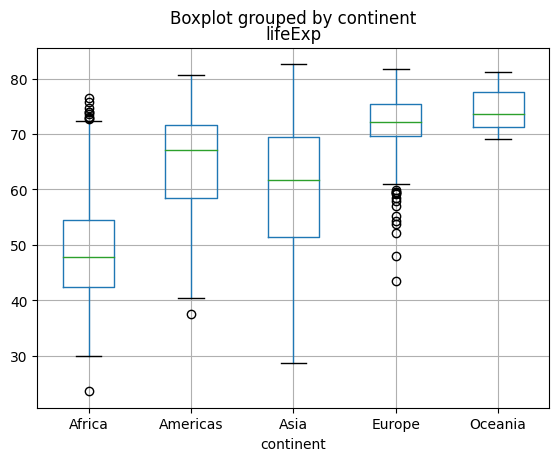

In [ ]:
gapminder.boxplot(column = "lifeExp", by="continent");

The matplotlib way

In [ ]:
plt.boxplot(gapminder["continent"], gapminder["lifeExp"]);

### Task

- Create a boxplot for `gdpPercap` instead. What do you notice ? Are you happy with how the plot looks? Any "trick" you can think to make this more readable?

- Advanced: can you create boxplots for `gdpPerCap` and `lifeExp` in one command?

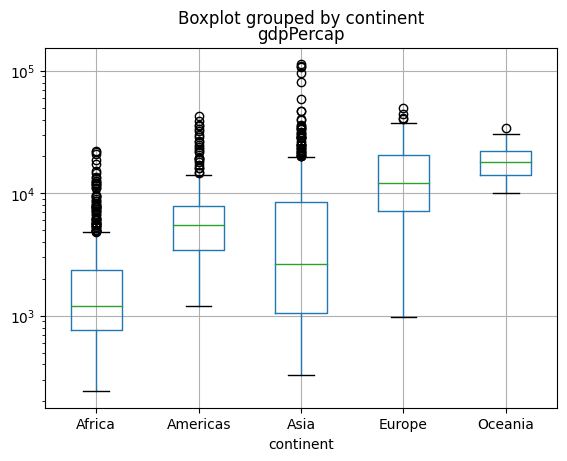

In [ ]:
gapminder.boxplot(column = "gdpPercap", by="continent");
plt.yscale("log")


--------------------------

Further Reading:

- [Python Plotting With Matplotlib Tutorial](https://realpython.com/python-matplotlib-guide/#:~:text=A%20Figure%20object%20is%20the,%E2%80%9D%20as%20we%20might%20expect).)

In [ ]:
import numpy as np
from scipy.stats import entropy

p = np.array([1/100, 99/100])
n=2
#p = np.array(np.ones)/n
H = entropy(p, base=2)
H

0.08079313589591118